## Cargando paquetes

In [47]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Configuración de visualización
%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

##  Cargando la Data desde Repositorio


In [5]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Path to dataset files:", path)

C:\Users\Pedro Yacila\OneDrive\Escritorio\python_1\PYTHON_DATA_ANALYTICS\DATA_3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.56k/8.56k [00:00<00:00, 7.55MB/s]

Extracting files...
Path to dataset files: C:\Users\Pedro Yacila\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


## Verificando si la data se descargo

In [6]:
import os
os.listdir(path)

['heart.csv']

## Cargando la Data

In [48]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "heart.csv"))

print("Dataset cargado - Dimensiones:", df.shape)
print("\nPrimeras filas:")
df.head()


Dataset cargado - Dimensiones: (918, 12)

Primeras filas:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Analisis Exploratorio (R

In [23]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [55]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
# Verificadno algunas de las Mediddas de Tendencia Central de la Data
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [54]:
print("\nValores faltantes por columna:")
df.isna().sum()


Valores faltantes por columna:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [32]:
# Valores Nulos
Nan_count_col1 =df.isna().sum()
Nan_count_col1

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [33]:
df.shape

(918, 12)

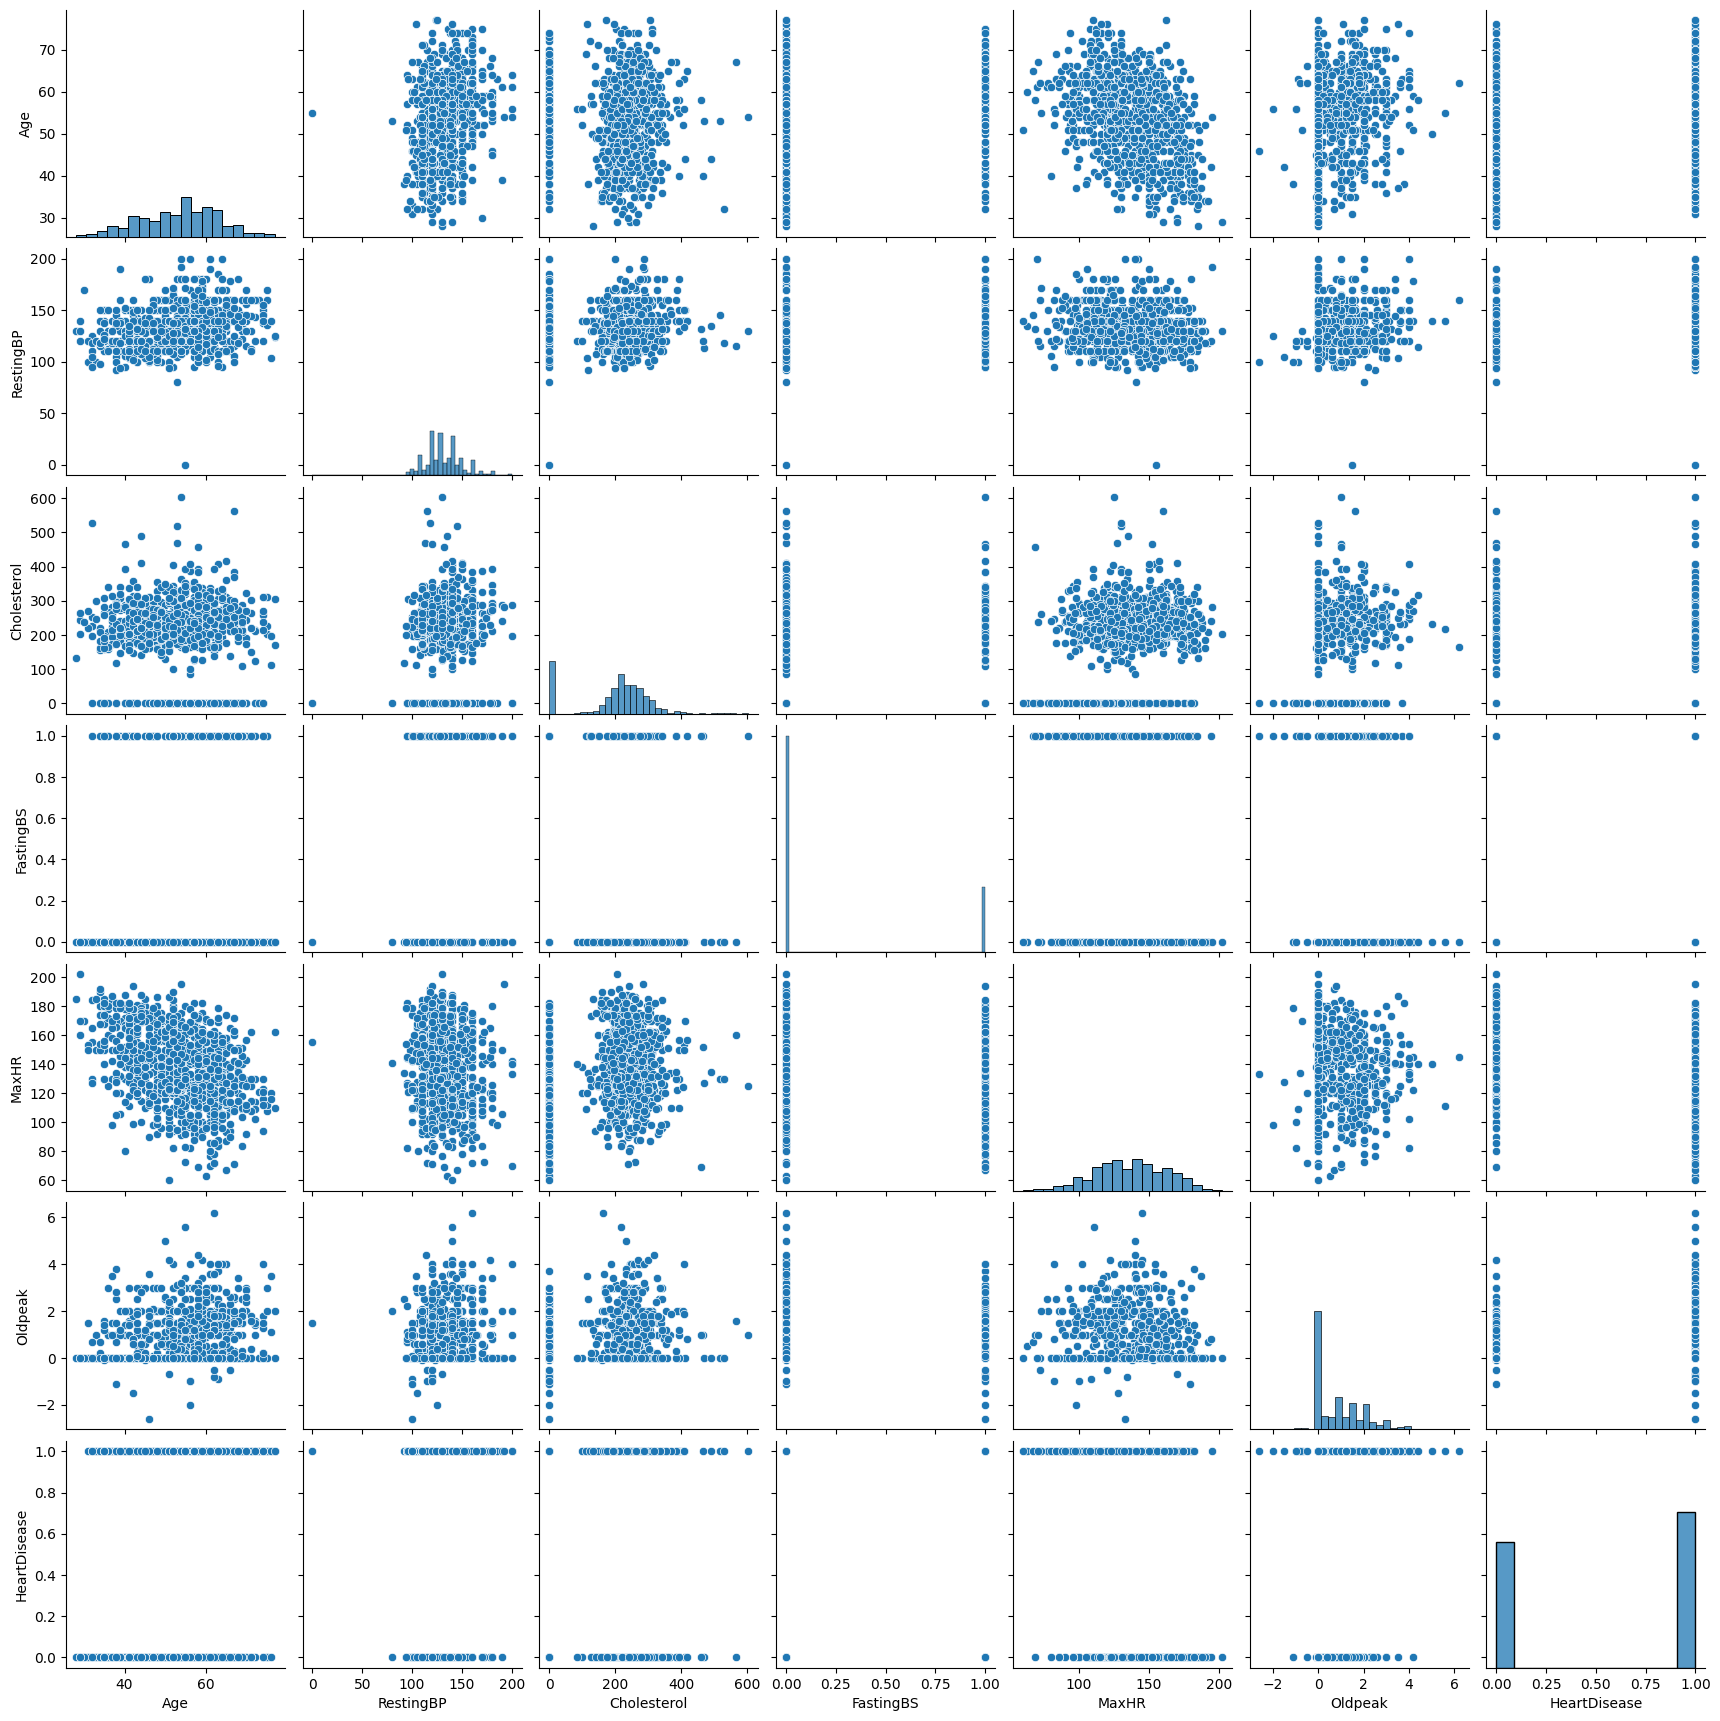

In [34]:
# Grafico de Dispersion
sns.pairplot(df)

### CONCLUSIONES DEL PAIRPLOT
1. Variables como Age, MaxHR y Oldpeak tienen variabilidad útil
   Age: distribución normal, pero con mayor riesgo de enfermedad cardíaca en mayores de 50–60 años (ver correlaciones cruzadas).
   MaxHR: los pacientes con menor frecuencia cardíaca máxima tienden a tener HeartDisease = 1.
   Oldpeak: valores más altos están relacionados con mayor riesgo (HeartDisease = 1).

2. Variables binarias como FastingBS o RestingECG aparecen discretizadas
   FastingBS y RestingECG solo tienen un par de niveles → se ven como franjas horizontales o verticales.
    No aportan relaciones visuales fuertes con otras variables en este gráfico.

3. Cholesterol y RestingBP tienen outliers
   Se observan puntos aislados con valores muy altos en ambas.
   Pueden necesitar tratamiento (e.g., winsorización o transformación log).

4. HeartDisease está bastante relacionado con varias variables
HeartDisease = 1 (presencia de enfermedad) parece tener alguna asociación negativa con MaxHR y positiva con Oldpeak.
 También parece haber agrupamientos más visibles en esas zonas.

In [53]:
print("\nValores únicos por columna:")
df.nunique()


Valores únicos por columna:


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


Análisis de la distribución de la variable objetivo


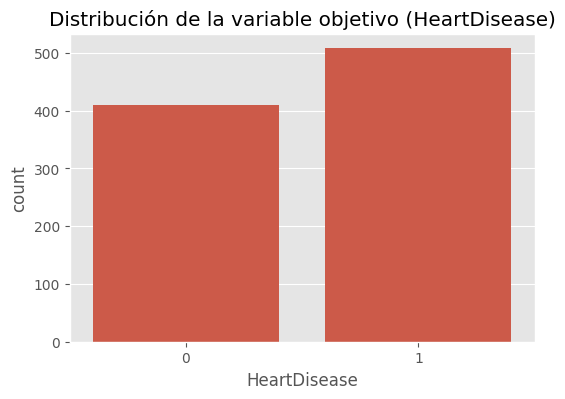

In [56]:
print("\nAnálisis de la distribución de la variable objetivo")
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribución de la variable objetivo (HeartDisease)')
plt.show()

#### 📌 Conclusión:
La variable objetivo HeartDisease está ligeramente desbalanceada, con más personas que sí tienen enfermedad cardíaca (clase 1) que las que no (clase 0).
Sin embargo, la diferencia no es extrema, por lo que no es necesario aplicar técnicas de balanceo como SMOTE o undersampling.
Esto permite entrenar modelos de clasificación sin preocuparse por un sesgo significativo debido al desbalance.

## Visualización de relaciones (opcional)

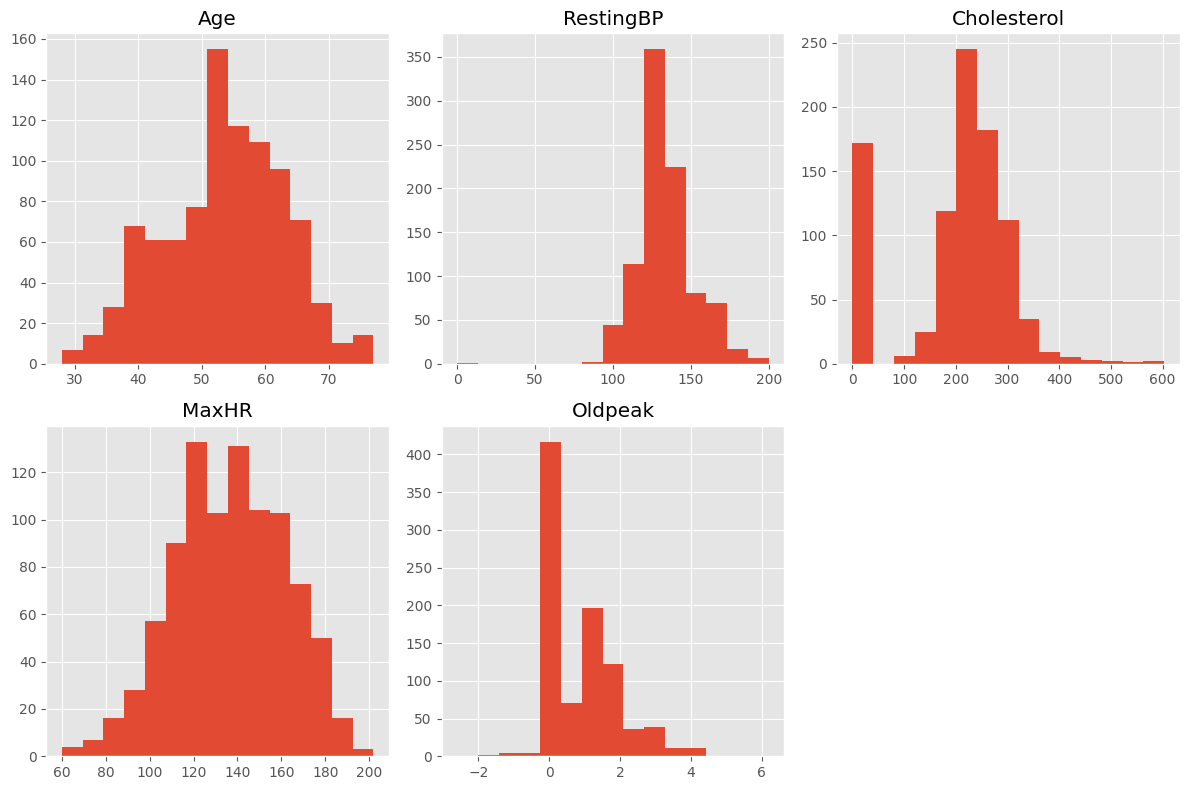

In [57]:
# Histogramas de características numéricas
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()


#### 📌 Conclusión:
1. Age: Distribución aproximadamente normal con una concentración entre los 40 y 60 años, lo que   indica que la mayoría de los pacientes son adultos de mediana edad o mayores.

2. RestingBP (presión arterial en reposo): Distribución sesgada a la derecha. La mayoría tiene   valores alrededor de 120 mmHg, pero hay algunos valores muy bajos o muy altos que podrían ser  outliers.

3. Cholesterol: Distribución también sesgada a la derecha. Hay muchos pacientes con valores entre  200 y 300, pero también hay valores cero o muy bajos que podrían ser datos faltantes  codificados como 0 o simplemente no válidos.

4. MaxHR (frecuencia cardíaca máxima alcanzada): Distribución bastante simétrica con mayoría de  valores entre 100 y 170. Parece una variable bien distribuida.

5. Oldpeak (depresión del ST inducida por ejercicio): Distribución fuertemente sesgada a la derecha. La mayoría tiene valores cercanos a 0, pero hay un grupo menor con valores altos (hasta 6), lo cual indica una gran variabilidad en el riesgo.

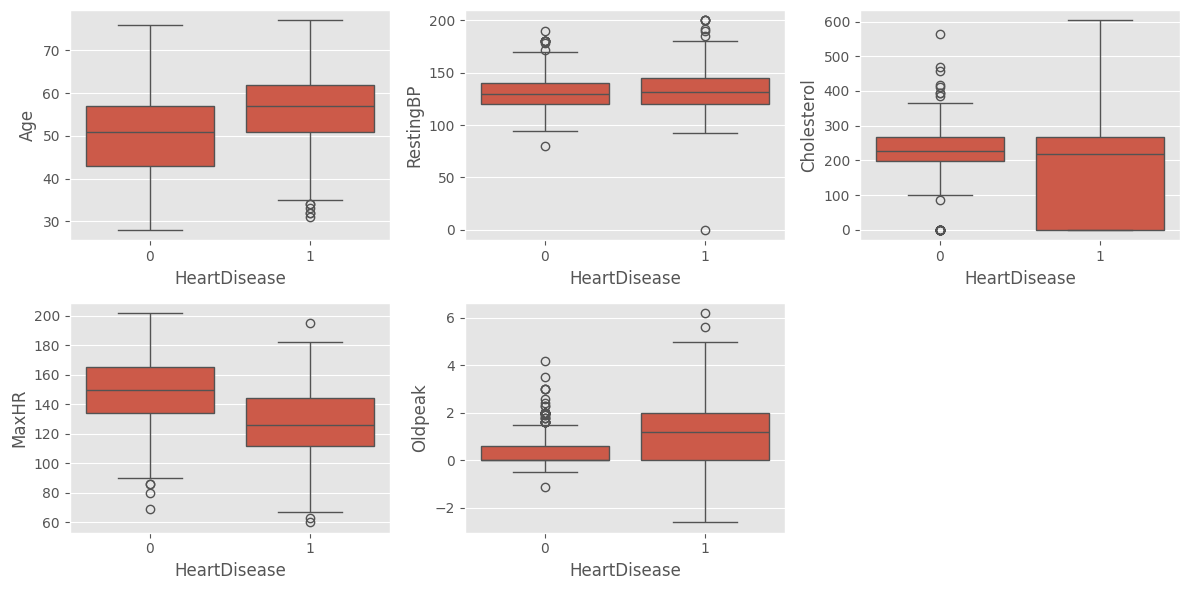

In [58]:
# Boxplots para ver distribución por clase
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=df)
plt.tight_layout()
plt.show()

#### 📌 Conclusión general resumida:
Edad alta, menor MaxHR y mayor Oldpeak se asocian con presencia de enfermedad cardíaca.
RestingBP y Colesterol muestran diferencias menos marcadas o más dispersas.

## Catagorizando las variables


In [59]:
# Definir características categóricas
cat_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]


In [60]:
# Codificación one-hot para RandomForest y XGBoost
df_encoded = pd.get_dummies(df, columns=cat_features, prefix=cat_features, drop_first=True)

In [39]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


###  División en train/val/test (60/20/20)


In [62]:
X_temp, X_test_enc, y_temp, y_test = train_test_split(
    X_enc, y, test_size=0.20, random_state=42, stratify=y
)
X_train_enc, X_val_enc, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Estandarización de características numéricas
num_cols = [c for c in X_train_enc.columns if c.startswith(tuple(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']))]
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_val_enc[num_cols] = scaler.transform(X_val_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

print("\nPreprocesamiento completado:")
print(f"Train shape: {X_train_enc.shape}, Val shape: {X_val_enc.shape}, Test shape: {X_test_enc.shape}")


Preprocesamiento completado:
Train shape: (550, 15), Val shape: (184, 15), Test shape: (184, 15)


#### 📌 En resumen, este bloque de código hace:
✔️ Divide tus datos en train (60%), validation (20%), test (20%)
✔️ Asegura la misma proporción de clases en cada partición
✔️ Estandariza las variables numéricas (Age, RestingBP, etc.)

## Modelo 1 - Random Forest con GridSearch

In [63]:
# Configuración de GridSearch
rf_param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [None, 8, 16],
    "min_samples_split": [2, 10],
}

rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, rf_param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
gs.fit(X_train_enc, y_train)

# Mejor modelo
rf_best = gs.best_estimator_
print("\n[Random Forest] Mejores parámetros encontrados:")
print(gs.best_params_)

# Evaluación rápida en validación
y_pred_val = rf_best.predict(X_val_enc)
print("\nExactitud en validación:", accuracy_score(y_val, y_pred_val))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

[Random Forest] Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

Exactitud en validación: 0.8369565217391305


Se probaron 12 combinaciones de parámetros con validación cruzada (5-fold) y se encontró que la mejor fue usar 300 árboles, sin limitar su profundidad, y dividiendo nodos solo si hay al menos 10 muestras.

Con esos parámetros, el modelo alcanzó un 83.7% de precisión en la validación.

## Modelo 2 - CatBoost

In [64]:
# Preparación de datos para CatBoost (sin one-hot encoding)
X_cb = df.drop("HeartDisease", axis=1)
y_cb = df["HeartDisease"]

# División train/test (manteniendo mismos índices para comparación justa)
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_cb, y_cb, test_size=0.20, random_state=42, stratify=y_cb
)
X_train_cb, X_val_cb, y_train_cb, y_val_cb = train_test_split(
    X_train_cb, y_train_cb, test_size=0.25, random_state=42, stratify=y_train_cb
)

# Entrenamiento de CatBoost
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric="AUC",
    verbose=100,
    random_state=42,
    early_stopping_rounds=50
)

cat_model.fit(
    X_train_cb,
    y_train_cb,
    cat_features=cat_features,
    eval_set=(X_val_cb, y_val_cb),
    use_best_model=True,
)

# Evaluación rápida en validación
y_pred_val_cb = cat_model.predict(X_val_cb)
print("\nExactitud en validación (CatBoost):", accuracy_score(y_val_cb, y_pred_val_cb))

0:	test: 0.8567073	best: 0.8567073 (0)	total: 175ms	remaining: 2m 55s
100:	test: 0.9111669	best: 0.9118843 (67)	total: 3.03s	remaining: 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9141559063
bestIteration = 145

Shrink model to first 146 iterations.

Exactitud en validación (CatBoost): 0.8369565217391305


#### 🧭 Conclusión general:
Aunque el AUC fue alto (91.4%), el accuracy final en validación fue 83.7%.

- Esto significa que el modelo es bueno para separar clases (AUC alto), pero en términos de predicciones correctas (accuracy) está alineado con tu Random Forest.

- Podrías comparar otras métricas (F1, Recall) para ver diferencias más finas.

## Modelo 3 - XGBoost

In [65]:
# Entrenamiento de XGBoost
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    early_stopping_rounds=50
)

xgb_model.fit(
    X_train_enc,
    y_train,
    eval_set=[(X_val_enc, y_val)],
    verbose=50,
)

# Evaluación rápida en validación
y_pred_val_xgb = xgb_model.predict(X_val_enc)
print("\nExactitud en validación (XGBoost):", accuracy_score(y_val, y_pred_val_xgb))

[0]	validation_0-auc:0.83961
[50]	validation_0-auc:0.90005
[100]	validation_0-auc:0.89993
[149]	validation_0-auc:0.89634

Exactitud en validación (XGBoost): 0.842391304347826


#### 🧭 Conclusión súper resumida:
XGBoost rindió ligeramente mejor en validación que Random Forest y CatBoost en tu experimento.
- AUC alto (~90%) indica muy buena capacidad de discriminación.
- Accuracy (~84.2%) confirma que su rendimiento en predicción es consistente y un poco mejor que tus otros modelos.
- Hay señales de ligero sobreajuste (AUC se empieza a estancar y bajar en las últimas iteraciones), por lo que podrías aplicar early stopping para frenarlo antes.

## Evaluación comparativa

In [66]:
def evaluate(model, X_t, y_t, name: str, is_catboost=False):
    if is_catboost:
        y_pred = model.predict(X_t)
        y_prob = model.predict_proba(X_t)[:, 1]
    else:
        y_pred = model.predict(X_t)
        y_prob = model.predict_proba(X_t)[:, 1]

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_t, y_pred),
        "ROC_AUC": roc_auc_score(y_t, y_prob),
        "F1": f1_score(y_t, y_pred),
    }

results = []

# Evaluación en conjunto de test
results.append(evaluate(rf_best, X_test_enc, y_test, "RandomForest"))
results.append(evaluate(cat_model, X_test_cb, y_test_cb, "CatBoost", is_catboost=True))
results.append(evaluate(xgb_model, X_test_enc, y_test, "XGBoost"))

results_df = pd.DataFrame(results).set_index("Model").sort_values("ROC_AUC", ascending=False)
print("\n=== Comparación de modelos en Test ===")
display(results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'ROC_AUC', 'F1']))


=== Comparación de modelos en Test ===


,Accuracy,ROC_AUC,F1
Model,,,
CatBoost,0.902174,0.928623,0.912621
XGBoost,0.880435,0.927666,0.892157
RandomForest,0.864130,0.924199,0.879227


#### 📣 CONCLUSIÓN GENERAL :
CatBoost es el mejor modelo de los tres.

- Tiene la mayor Accuracy (90.2%), indicando que predice bien en general.

- Tiene el mayor ROC_AUC (~0.929) → el mejor separando positivos de negativos.

- Tiene el mayor F1 (0.913) → el mejor balance entre precision y recall, muy importante si las clases están desbalanceadas.

En esta comparación, CatBoost mostró el mejor desempeño general con mayor exactitud (90.2%), capacidad de discriminación (AUC 0.929) y balance entre precisión y recall (F1 0.913). XGBoost también obtuvo métricas altas pero consistentemente un poco menores, mientras que Random Forest fue el más bajo de los tres. Por ello, CatBoost es la opción recomendada para este problem


## Guardar del mejor modelo

In [67]:
best_model_name = results_df['ROC_AUC'].idxmax()
print(f"\nMejor modelo según ROC_AUC: {best_model_name}")

if best_model_name == "RandomForest":
    import joblib
    joblib.dump(rf_best, "best_model_rf.pkl")
    print("Modelo RandomForest guardado como 'best_model_rf.pkl'")
elif best_model_name == "CatBoost":
    cat_model.save_model("best_model_catboost.cbm")
    print("Modelo CatBoost guardado como 'best_model_catboost.cbm'")
else:
    xgb_model.save_model("best_model_xgb.json")
    print("Modelo XGBoost guardado como 'best_model_xgb.json'")


Mejor modelo según ROC_AUC: CatBoost
Modelo CatBoost guardado como 'best_model_catboost.cbm'


## Visualización de importancia de características

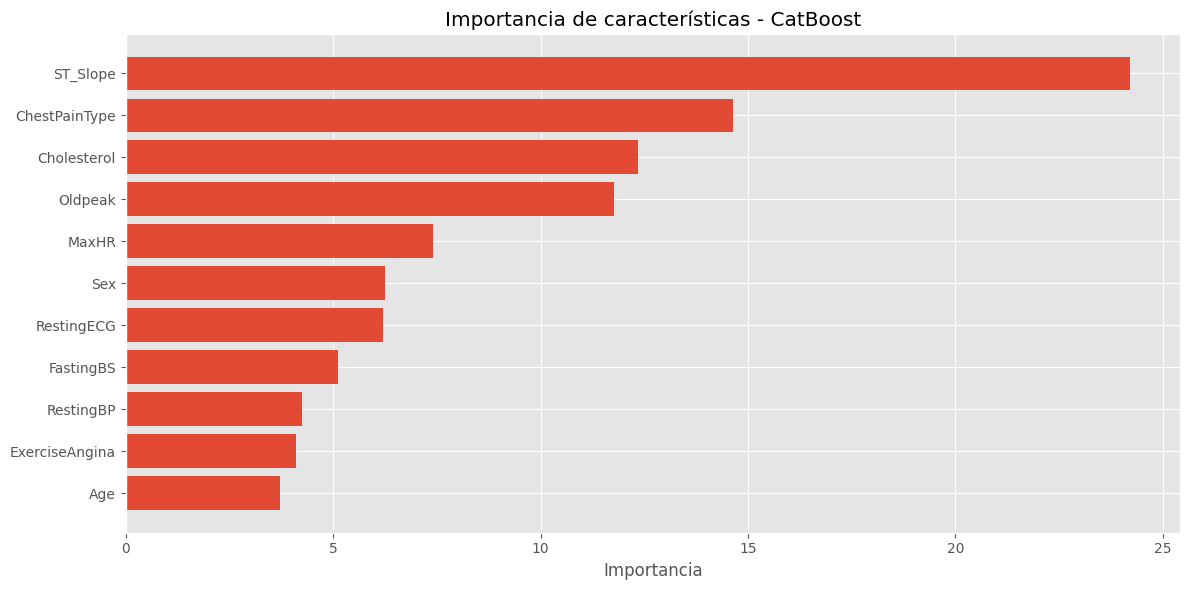

In [68]:
plt.figure(figsize=(12, 6))

if best_model_name == "RandomForest":
    importances = rf_best.feature_importances_
    features = X_train_enc.columns
elif best_model_name == "CatBoost":
    importances = cat_model.get_feature_importance()
    features = X_train_cb.columns
else:
    importances = xgb_model.feature_importances_
    features = X_train_enc.columns

sorted_idx = np.argsort(importances)[-15:]  # Top 15 características
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title(f'Importancia de características - {best_model_name}')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

#### 📌 Interpretación resumida en texto formal:

El análisis de importancia de características en el modelo CatBoost revela que las variables más predictivas de enfermedad cardíaca son ST_Slope, ChestPainType, Cholesterol, Oldpeak y MaxHR. Estas variables tienen relevancia clínica directa, pues están asociadas con indicadores electrocardiográficos, síntomas de dolor torácico y factores de riesgo metabólico. El resultado valida la capacidad del modelo para identificar patrones médicos relevantes y respalda su utilidad para apoyar el diagnóstico.